##  How well do jobs and skills pay for Data Analysts?

# Methodology

1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

In [30]:
import pandas as pd
import seaborn as sns
import ast
import matplotlib.pyplot as plt
from datasets import load_dataset

df = pd.read_csv(r"C:\Users\DELL\Desktop\70K Data Analysis\data_jobs.csv")

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list)

In [31]:
df_US = df[df['job_location'] == 'United States'].dropna(subset=['salary_year_avg'])

In [32]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Data Analyst',
 'Machine Learning Engineer']

In [33]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [34]:
job_order = df_US_top6.groupby(['job_title_short'])['salary_year_avg'].median().sort_values(ascending=False).index

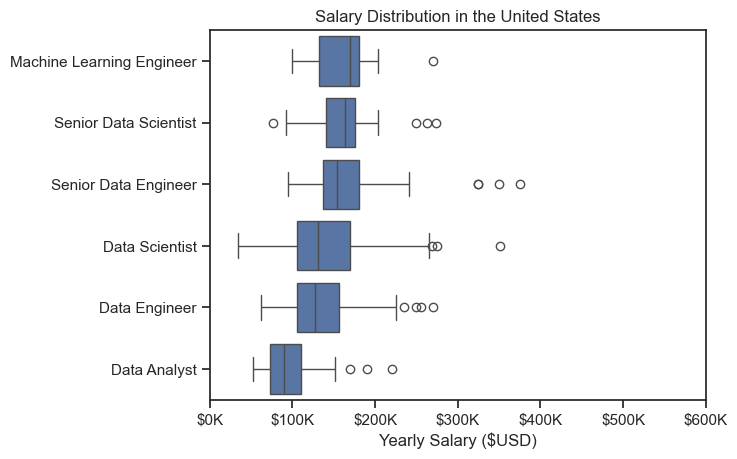

In [35]:
sns.boxplot(data=df_US_top6, x='salary_year_avg', y= 'job_title_short', order =job_order)
sns.set_theme(style="ticks")

plt.title('Salary Distribution in the United States')
plt.ylabel('')
plt.xlabel('Yearly Salary ($USD)')
plt.xlim(0,600000)
ticks_x = plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

# Investigate Median Salary Vs Skill for Data Analysts

In [ ]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') &(df['job_location']=='United States')].copy()

df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [37]:
df_DA_US = df_DA_US.explode('job_skills')

In [38]:
df_DA_US[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
18059,54000.0,sql
18059,54000.0,excel
18059,54000.0,ms access
19941,100500.0,python
19941,100500.0,sql


In [43]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
pytorch,1,220000.0
jira,1,190000.0
atlassian,1,190000.0
unity,1,169833.5
git,1,147500.0
snowflake,2,132225.0
perl,1,119550.0
spss,1,119550.0
qlik,1,119550.0


In [44]:
df_DA_skills =  df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
power bi,10,106400.00
sql server,3,105000.00
python,15,100000.00
sas,4,93525.00
tableau,16,88500.00
sql,20,88500.00
r,8,88500.00
excel,14,82258.75
sharepoint,5,77017.50


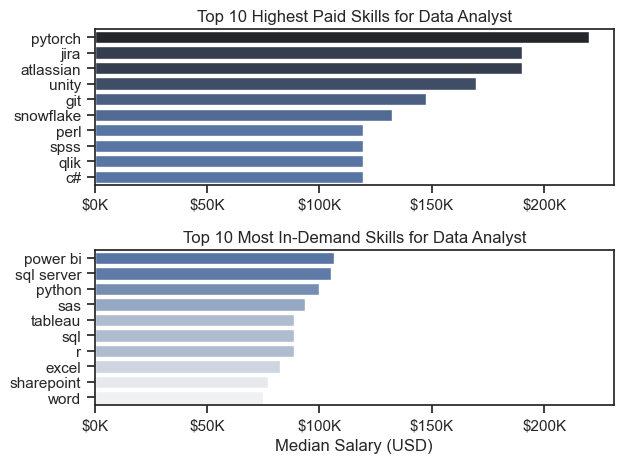

In [45]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style="ticks")

sns.barplot(data = df_DA_top_pay, x = 'median', y= df_DA_top_pay.index, ax= ax[0], hue='median', palette ='dark:b_r')
ax[0].legend().remove()
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

sns.barplot(data = df_DA_skills, x = 'median', y= df_DA_skills.index, ax= ax[1], hue='median', palette ='light:b')
ax[1].legend().remove()
#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()